### Title: Exercice 8.2
### Author: Jerock Kalala
### Date: November 08 2022
### Professor: David Kinney
### Visualizing Data with Pandas and Matplotlib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv("E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Week_8\\data\\fb_stock_prices_2018.csv",
                 index_col='date', parse_dates=True)
quakes = pd.read_csv("E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Week_8\\data\\earthquakes.csv")

print(fb.head())
print()
print(quakes.head())

              open    high       low   close    volume
date                                                  
2018-01-02  177.68  181.58  177.5500  181.42  18151903
2018-01-03  181.88  184.78  181.3300  184.67  16886563
2018-01-04  184.90  186.21  184.0996  184.33  13880896
2018-01-05  185.59  186.90  184.9300  186.85  13574535
2018-01-08  187.20  188.90  186.3300  188.28  17994726

    mag magType           time                  place  tsunami parsed_place
0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California


##### 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

Text(0.5, 1.0, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

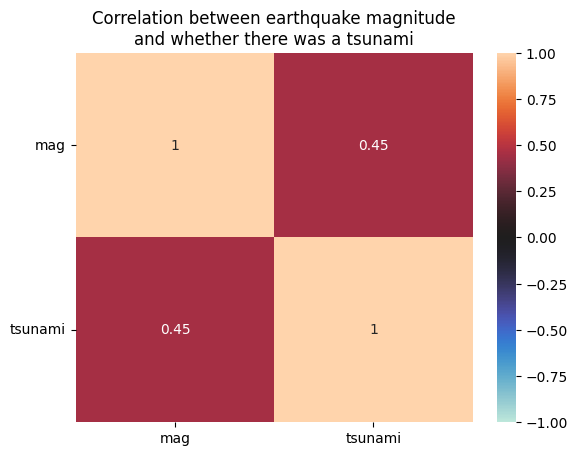

In [5]:
sns.heatmap(quakes.query('magType == "mb"')[['mag','tsunami']].corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.yticks(rotation=0)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami')

##### 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to se subplots.)

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

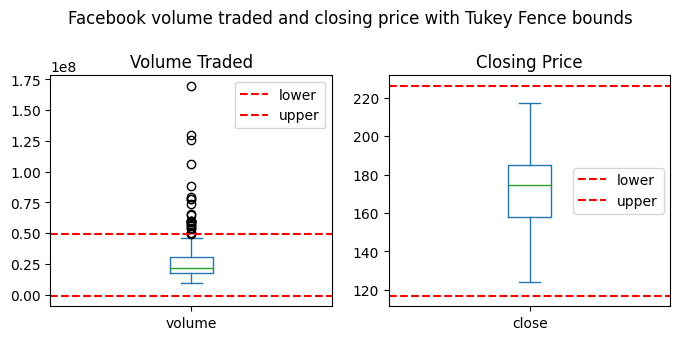

In [6]:
cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])

for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound,
            color='red',
            linestyle='dashed',
            label=name
        )

        ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

##### 3. Fill in the area between the bounds in the plot from exercise #2.

-899775.0
lower
49042009.0
upper
116.88250000000008
lower
226.30249999999992
upper


Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

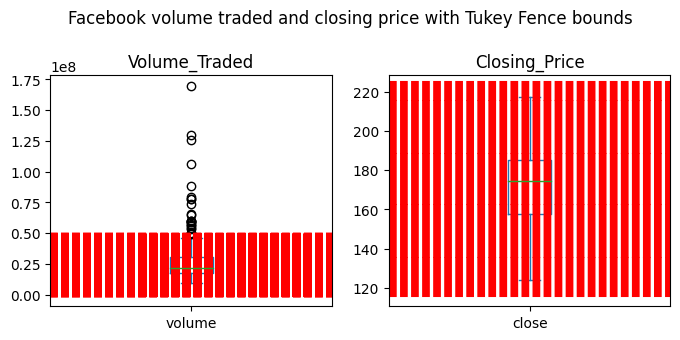

In [9]:
ols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume_Traded', 'Closing_Price'])

for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    print(lower)
    print("lower")
    print(upper)
    print("upper")
for i in range(116,226):
    axes[1].axhline(
        i,
        color='red',
        linestyle='dashed',
    )
for i in range(-899775,49042009,10000):
    axes[0].axhline(
        i,
        color='red',
        linestyle='dashed',
    )

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

#### 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

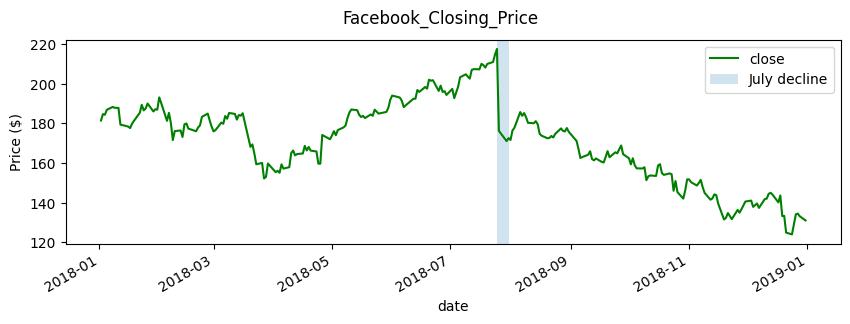

In [17]:
fb.close.plot(kind='line', color ='green', figsize=(10, 3))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.2, label='July decline')
plt.ylabel('Price ($)')
plt.suptitle('Facebook_Closing_Price')
plt.legend()

##### 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:


- Disappointing user growth announced after close on July 25,2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

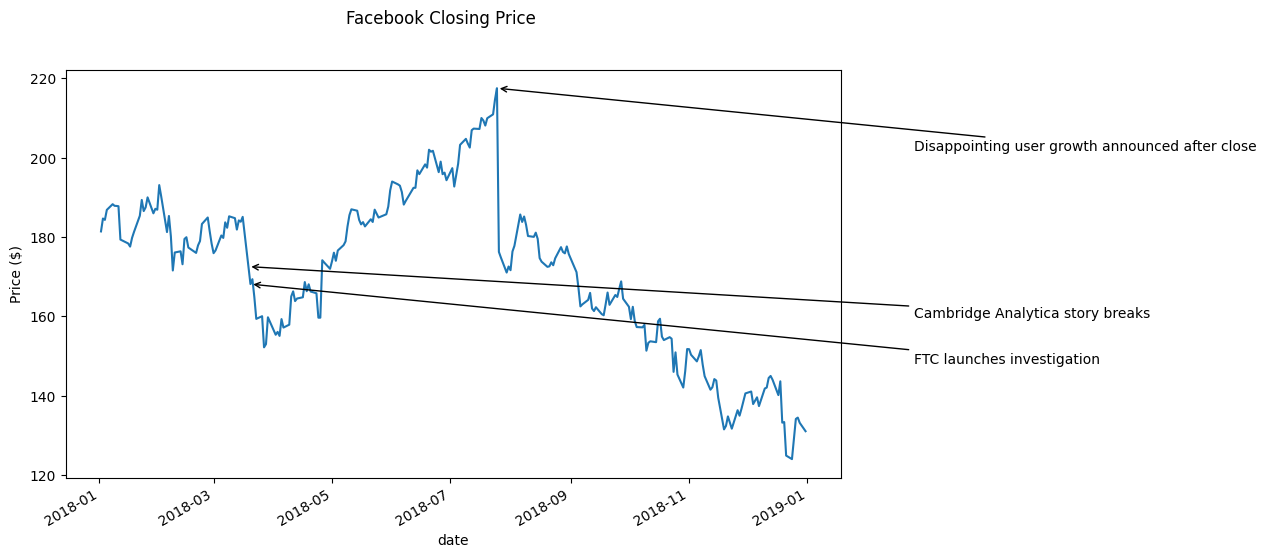

In [21]:
fb.close.plot(kind='line', figsize=(10, 6))

notes = [('Disappointing user growth announced after close', '2018-07-25'),
         ('Cambridge Analytica story breaks', '2018-03-19'), ('FTC launches investigation', '2018-03-20')]

# for repeatable random jitter
np.random.seed(1)

for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(text, xy=(date, y_value), xytext=('2019-02-25', y_value + jitter), arrowprops=dict(arrowstyle='->'))
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')

##### 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [40]:
def reg_resid_plots(data):

    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(
        permutation_count,
        2,
        figsize=(15, 4 * permutation_count)
    )

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')

    return fig.axes

[<AxesSubplot: xlabel='close', ylabel='volume'>,
 <AxesSubplot: xlabel='close', ylabel='residuals'>,
 <AxesSubplot: xlabel='volume', ylabel='close'>,
 <AxesSubplot: xlabel='volume', ylabel='residuals'>]

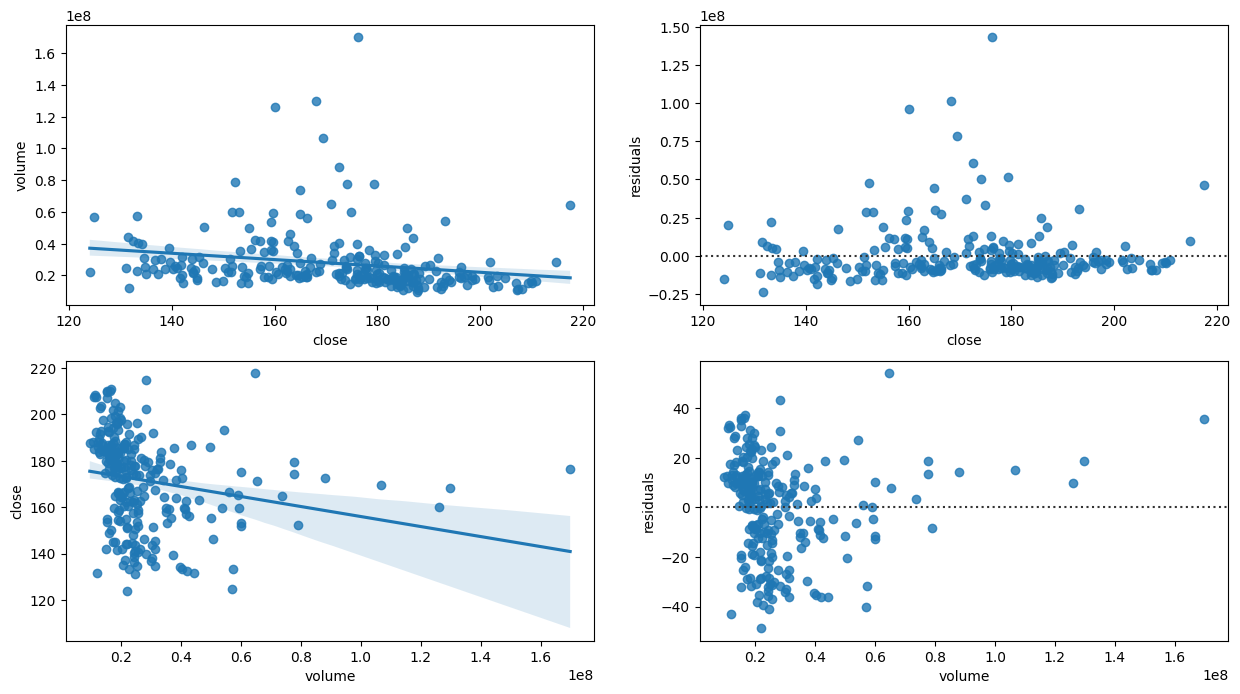

In [36]:
reg_resid_plots(fb[['close', 'volume']])